In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
from deap import base,creator,tools

In [3]:
Induvidual_Length = 10

In [4]:
def FitnessFunction(individual):
  return sum(individual),

In [5]:
creator.create("Fitness", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.Fitness)

In [6]:
toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)
toolbox.zeroOrOne()

1

In [7]:
toolbox.register("individualGenerator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, Induvidual_Length)
toolbox.individualGenerator()

[1, 1, 1, 1, 1, 0, 1, 0, 0, 0]

In [8]:
toolbox.register("populationGenerator", tools.initRepeat, list, toolbox.individualGenerator)
toolbox.populationGenerator(4)

[[0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
 [1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 1, 0, 1, 0, 1, 1, 1, 1],
 [1, 0, 1, 0, 0, 1, 1, 0, 0, 0]]

In [9]:
toolbox.register("evaluate", FitnessFunction)
toolbox.evaluate([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

(5,)

In [10]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [11]:
generation = 0
generationMaxFitness = []
generationMeanFitness = []

In [12]:
population = toolbox.populationGenerator(10)
fitnessValues = list(map(toolbox.evaluate, population))
fitnessValues

[(2,), (3,), (6,), (7,), (5,), (5,), (5,), (7,), (5,), (4,)]

In [13]:
for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue
fitnessValues = [individual.fitness.values[0] for individual in population]
fitnessValues

[2.0, 3.0, 6.0, 7.0, 5.0, 5.0, 5.0, 7.0, 5.0, 4.0]

In [14]:
while(max(fitnessValues) < Induvidual_Length and generation < 50):
    generation = generation + 1
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
        
    newIndividuals = [i for i in offspring if not i.fitness.valid]
    newFitnessValues = list(map(toolbox.evaluate, newIndividuals))
        
    for individual, fitnessValue in zip(newIndividuals, newFitnessValues):
        individual.fitness.values = fitnessValue
    population[:] = offspring
    fitnessValues = [individual.fitness.values[0] for i in population]

    maximum = max(fitnessValues)
    mean = sum(fitnessValues) / len(population)
    generationMaxFitness.append(maximum)
    generationMeanFitness.append(mean)
    print("Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generation, maximum, mean))

Generation 1: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 2: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 3: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 4: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 5: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 6: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 7: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 8: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 9: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 10: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 11: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 12: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 13: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 14: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 15: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 16: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 17: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 18: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 19: Max Fitness = 4.0, Avg Fitness = 4.0
Generation 20: Max Fi

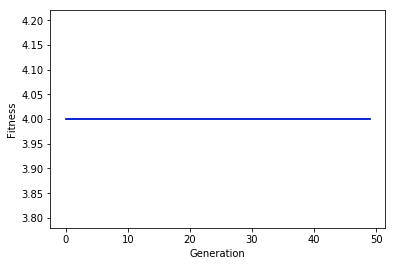

In [15]:
plt.plot(generationMaxFitness, color='Green')
plt.plot(generationMeanFitness, color='Blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()